In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
file_folder = 'input/raw'
nasa_filepath = 'input/raw/nasa.csv'

In [4]:
# The file contains all asteroids and their correct classification
nasa = pd.read_csv(nasa_filepath)
nasa.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [5]:
def plot_distribution(data, feature):
    import seaborn as sns
    _ = sns.distplot(data[feature])

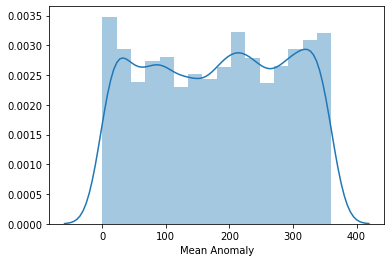

In [6]:
plot_distribution(nasa, 'Mean Anomaly')

In [7]:
# A lot of imperial vs. metric vs. astronomical which we will elimante and go full SI unit
nasa.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [8]:
nasa.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [9]:
features = ['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 
           'Epoch Date Close Approach', 'Relative Velocity km per sec', 
           'Miss Dist.(Astronomical)',  
           'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
           'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
           'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
           'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
           'Mean Motion', 'Hazardous']

In [10]:
df = nasa[features]
df['Hazardous'] = df['Hazardous'].map({True: 1, False: 0})
df['Hazardous'] = df['Hazardous'].astype('category')

f:\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
f:\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
X_train, X_val, y_train, y_val = train_test_split(df.drop(['Hazardous'], axis=1), df['Hazardous'], test_size=0.3, stratify=df['Hazardous'], random_state=420)

In [12]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

0    0.839024
1    0.160976
Name: Hazardous, dtype: float64
0    0.838664
1    0.161336
Name: Hazardous, dtype: float64


## Start the logistic regression

In [13]:
lg = LogisticRegression(penalty='l2')

In [14]:
lg.fit(X_train, y_train)

LogisticRegression()

In [15]:
p1 = lg.predict(X_val)

In [16]:
pp1 = pd.DataFrame(p1, columns=['prediction'])

In [17]:
pp1.prediction.value_counts()

0    1407
Name: prediction, dtype: int64

In [18]:
y_val.value_counts()

0    1180
1     227
Name: Hazardous, dtype: int64

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

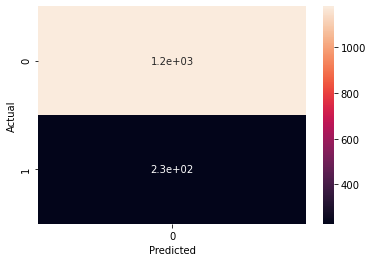

In [19]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_val, p1, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# Start the Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [21]:
rf = RandomForestClassifier(n_estimators=50)
scores = cross_val_score(rf, X_train, y_train, cv=10)
print(scores)

[0.99695122 1.         0.99695122 0.99695122 0.99695122 1.
 0.99695122 0.99695122 0.99390244 1.        ]


In [22]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [23]:
p2 = rf.predict(X_val)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

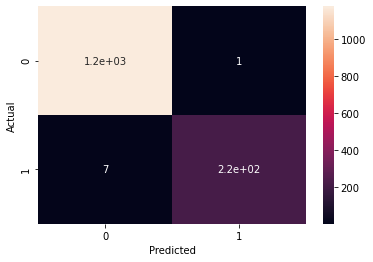

In [24]:
confusion_matrix = pd.crosstab(y_val, p2, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# Start the xgboost classifier

In [32]:
from xgboost import XGBClassifier

In [33]:
xgb = XGBClassifier()
xscores = cross_val_score(xgb, X_train, y_train, cv=10)
print(xscores)

[0.99695122 1.         0.99695122 0.99695122 0.99695122 1.
 0.99695122 1.         0.99390244 0.99695122]


In [34]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
p3 = xgb.predict(X_val)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

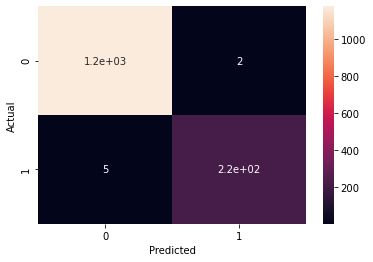

In [36]:
confusion_matrix = pd.crosstab(y_val, p3, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# ROC plots of the three models

In [37]:
from sklearn.metrics import roc_curve

In [45]:
fpr1, tpr1, _ = roc_curve(y_val, p1)
fpr2, tpr2, _ = roc_curve(y_val, p2)
fpr3, tpr3, _ = roc_curve(y_val, p3)

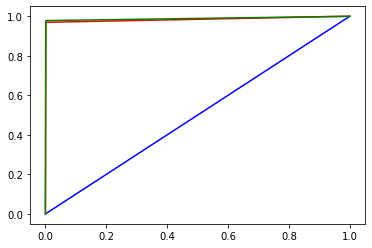

In [46]:
_ = plt.plot(fpr1, tpr1, 'b', fpr2, tpr2, 'r', fpr3, tpr3, 'g')

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])